# _**PRÁCTICA 4 - MIND**_


_Pablo Martín de Benito_


---

In [149]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.model_selection import StratifiedKFold
from statistics import mode


In [11]:
datos = pd.read_table("seeds_dataset.txt", header=None)
datos

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [70]:
X = StandardScaler().fit_transform(datos.iloc[:,:-1])
X.shape

y = datos.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: 7, Length: 210, dtype: int64

### Algoritmo de las kmedias


In [81]:
K = np.arange(3,51)
kf = StratifiedKFold(n_splits=10)

In [94]:
# Su solucion

max_clusters = 50
min_clusters =np.unique(y).shape[0]
k = [str(i) for i in range(min_clusters, max_clusters+1)]
tabla = pd.DataFrame(columns=k, data=None, dtype=float)
tabla.columns.name = "Clusters"
tabla.index.name = "CV"

for c in K:
    kmedias = KMeans(n_clusters=int(c), n_init="auto", random_state=0)

    cv = 0
    for train_index, test_index in kf.split(X, y):
        X_train, y_train, X_test, y_test = X[train_index], y[train_index], X[test_index], y[test_index]

        labels = kmedias.fit_predict(X_train)
        moda = np.array([mode(y_train[labels == i]) for i in range(int(c))])

        tabla.loc[cv, str(c)] = np.mean(moda[kmedias.predict(X_test)] == y_test)


        cv += 1

print(tabla)


Clusters         3         4         5         6         7         8  \
CV                                                                     
0         1.000000  1.000000  1.000000  0.952381  1.000000  0.952381   
1         0.952381  0.857143  0.857143  0.904762  0.952381  0.904762   
2         0.952381  1.000000  0.904762  0.857143  0.904762  0.904762   
3         0.904762  0.904762  0.857143  0.952381  0.857143  0.809524   
4         1.000000  0.952381  0.857143  0.904762  0.857143  0.952381   
5         0.952381  0.904762  1.000000  0.952381  0.904762  0.857143   
6         0.952381  1.000000  0.952381  1.000000  0.952381  0.952381   
7         0.857143  0.952381  0.952381  0.809524  0.904762  0.857143   
8         0.714286  0.809524  0.809524  0.857143  0.904762  0.809524   
9         0.809524  0.619048  0.761905  0.619048  0.857143  0.761905   

Clusters         9        10        11        12  ...        41        42  \
CV                                                ...     

In [140]:
tasas = tabla.mean(axis=0)
tasas

Clusters
3     0.909524
4     0.900000
5     0.895238
6     0.880952
7     0.909524
8     0.876190
9     0.876190
10    0.871429
11    0.880952
12    0.876190
13    0.871429
14    0.876190
15    0.885714
16    0.895238
17    0.885714
18    0.876190
19    0.890476
20    0.871429
21    0.914286
22    0.914286
23    0.914286
24    0.923810
25    0.928571
26    0.923810
27    0.923810
28    0.919048
29    0.909524
30    0.914286
31    0.914286
32    0.909524
33    0.909524
34    0.900000
35    0.885714
36    0.871429
37    0.866667
38    0.880952
39    0.890476
40    0.895238
41    0.895238
42    0.890476
43    0.880952
44    0.880952
45    0.885714
46    0.885714
47    0.890476
48    0.890476
49    0.895238
50    0.900000
dtype: float64

In [141]:
print(tasas.idxmax())
np.max(tasas)

25


np.float64(0.9285714285714286)

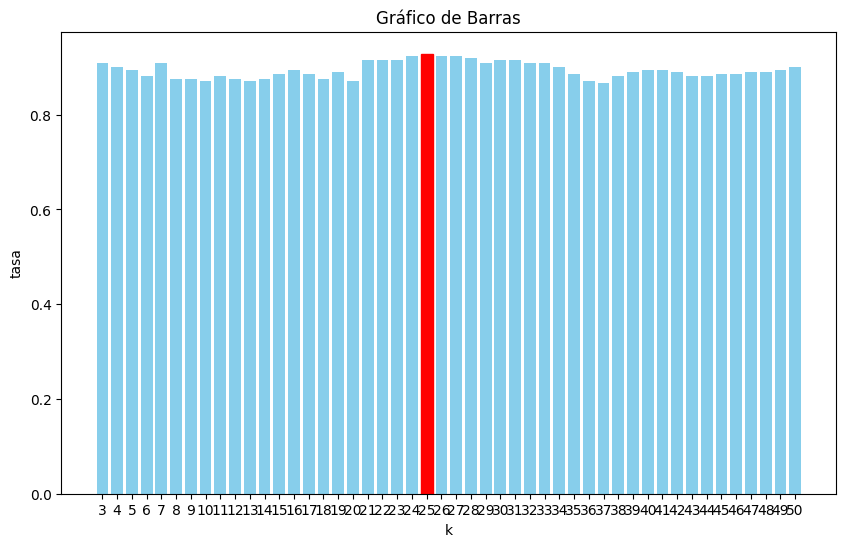

In [146]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
plt.figure(figsize=(10,6))


bars = plt.bar(tasas.index,tasas, color='skyblue')
bars[np.argmax(tasas)].set_color('red')

# Añadir título y etiquetas
plt.title('Gráfico de Barras')
plt.xlabel('k')
plt.ylabel('tasa')

# Mostrar el gráfico
plt.show()

### Dendograma

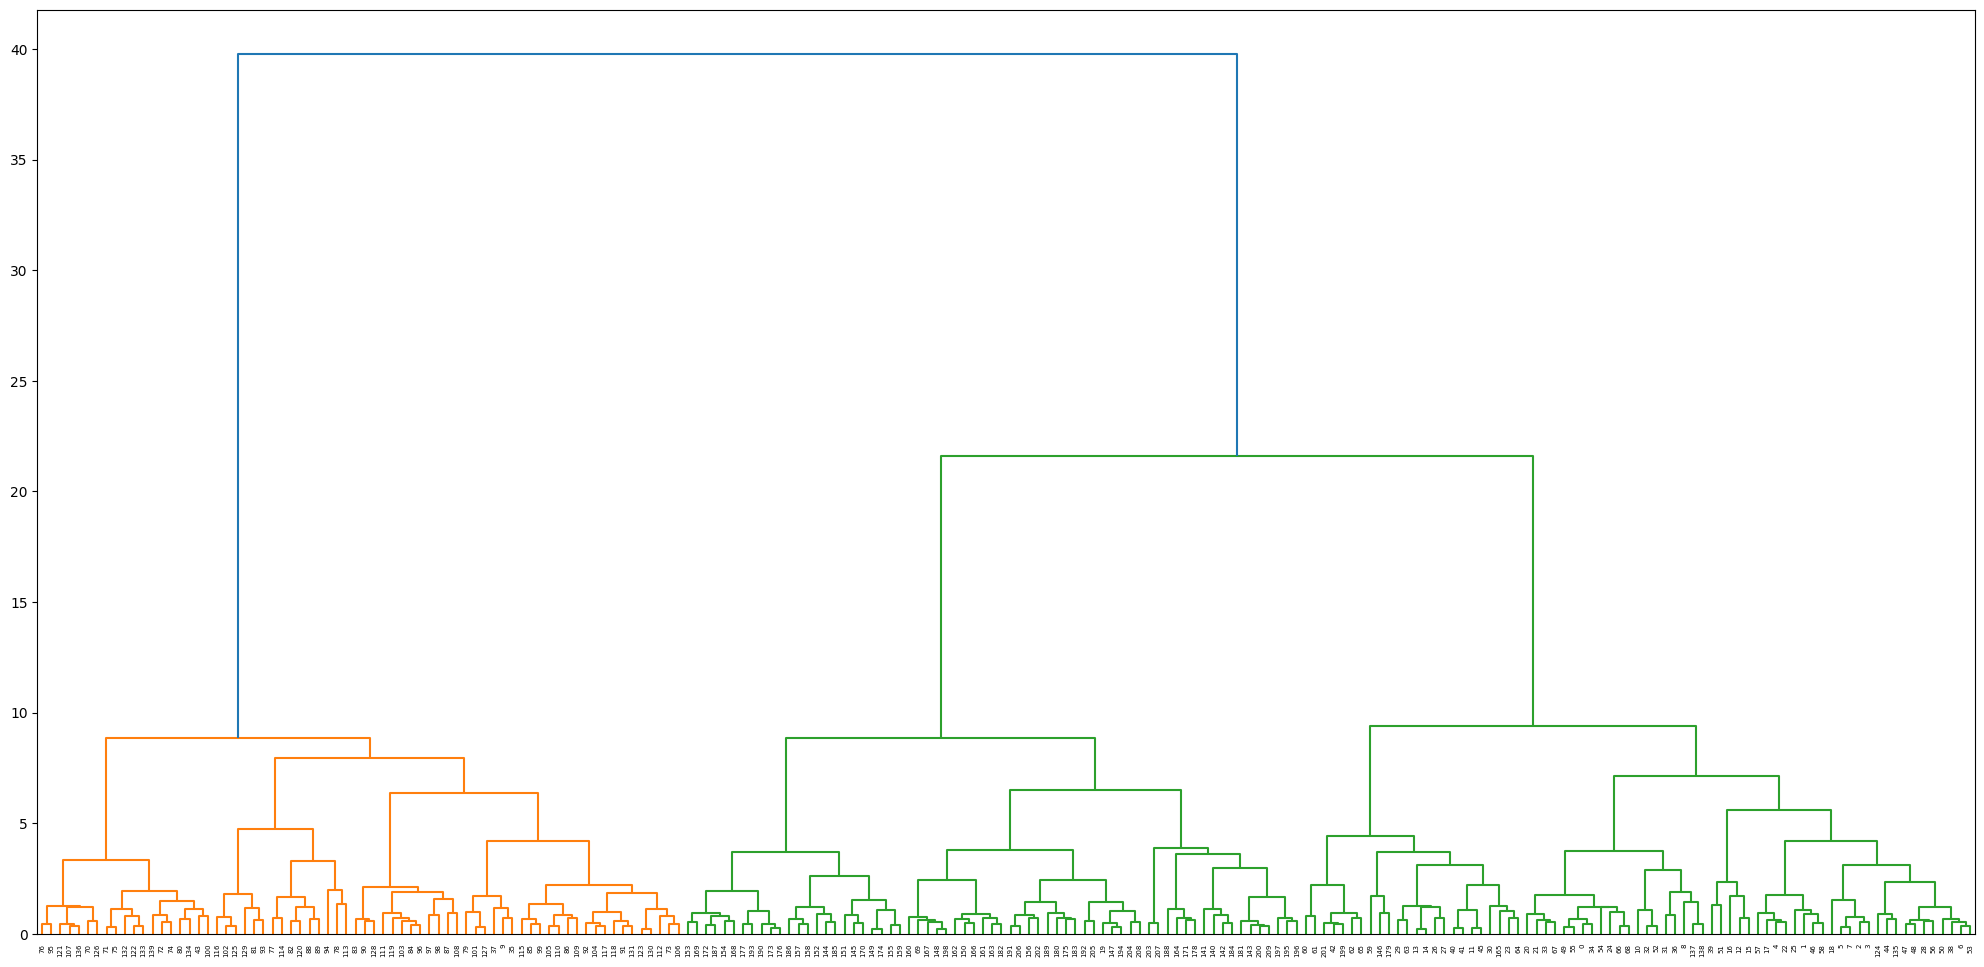

In [148]:
plt.figure(figsize=(25,12))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

### Algoritmo Aglomerativo

In [152]:
# Aglomerative Accuracy 
K = 25
y_hc = AgglomerativeClustering(n_clusters=K, metric = 'euclidean', linkage = 'ward').fit_predict(X)

moda_hc = np.array([mode(y[y_hc==i]) for i in range(K)], dtype=int)

print("Tasa de Aciertos (Jerárquico K=25): ", np.mean(moda_hc[y_hc] == y))

Tasa de Aciertos (Jerárquico K=25):  0.9333333333333333
